# AST 4930 Week 5

## Two circles

(-1.5, 1.5)

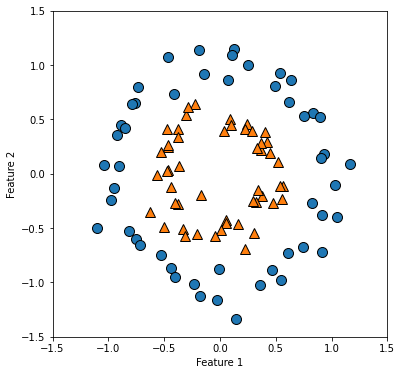

In [1]:
import sklearn
import mglearn
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 6))

# In this example, I used noise=0.1, factor=0.5, random_state=0, 
# but you can change the parameters and see how kNN/DT behaves for easier/more difficult problems.

X, y = sklearn.datasets.make_circles(noise=0.1, factor=0.5, random_state=0)

mglearn.discrete_scatter(X[:,0], X[:,1], y)

ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_xlim(-1.5,1.5)
ax.set_ylim(-1.5,1.5)

### TODO: Split the data.

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# Use random_state=0 for reproducibility.

### TODO: Choose either kNN or DT, run GridSearchCV, and find the best model

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

param_grid = {'max_depth': np.arange(30)+1,
              'criterion': ['gini','entropy']}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, cv=5, 
                           return_train_score=True, verbose=1, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best model: {}".format(grid_search.best_estimator_))
print("Test score: {:.2f}".format(grid_search.score(X_test, y_test)))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best parameters: {'criterion': 'entropy', 'max_depth': 4}
Best model: DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)
Test score: 1.00


### Let's plot the decision boundary.

Text(0, 0.5, 'feature 2')

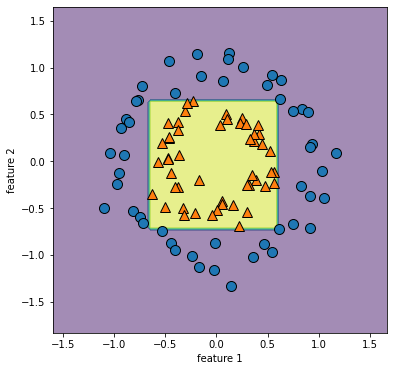

In [11]:
#First, make a 2d mesh.
xx = np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 100)
yy = np.linspace(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5, 100)

XX, YY = np.meshgrid(xx, yy)

#Model prediction.
Z = grid_search.best_estimator_.predict(np.c_[XX.ravel(), YY.ravel()])

#Now let's reshape to match with the meshgrid.
Z = Z.reshape(XX.shape)

#Now make the plot.

fig, ax = plt.subplots(figsize=(6, 6))

ax.contourf(XX, YY, Z, alpha=0.5)

#Let's over-plot training/test data points.
mglearn.discrete_scatter(X[:,0], X[:,1], y)

ax.set_xlabel('feature 1')
ax.set_ylabel('feature 2')